In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("Data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
data=pd.get_dummies(data)

In [ ]:
data

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [ ]:
x=data[["Age","EstimatedSalary","Gender_Female","Gender_Male"]]

In [ ]:
y=data[["Purchased"]]

In [ ]:
x

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,1,0
3,27.0,57000.0,1,0
4,19.0,76000.0,0,1
...,...,...,...,...
395,46.0,41000.0,1,0
396,51.0,23000.0,0,1
397,50.0,20000.0,1,0
398,36.0,33000.0,0,1


In [ ]:
st=StandardScaler()
scaled=st.fit_transform(x)

In [ ]:
scaled

array([[-1.78179743, -1.49004624, -1.02020406,  1.02020406],
       [-0.25358736, -1.46068138, -1.02020406,  1.02020406],
       [-1.11320552, -0.78528968,  0.98019606, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138,  0.98019606, -0.98019606],
       [-0.15807423, -1.07893824, -1.02020406,  1.02020406],
       [ 1.08359645, -0.99084367,  0.98019606, -0.98019606]])

In [ ]:
x=pd.DataFrame(scaled,columns=[["Age","EstimatedSalary","Gender_Female","Gender_Male"]])

In [ ]:
x

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204
...,...,...,...,...
395,0.797057,-0.844019,0.980196,-0.980196
396,1.274623,-1.372587,-1.020204,1.020204
397,1.179110,-1.460681,0.980196,-0.980196
398,-0.158074,-1.078938,-1.020204,1.020204


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [ ]:
model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.9

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_proba=model.predict_proba(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_predicted=y_proba[:,1]

In [ ]:
y_predicted

array([0.91, 0.99, 0.04, 0.  , 0.  , 0.  , 0.  , 0.95, 0.1 , 0.89, 0.  ,
       0.07, 0.57, 0.  , 0.  , 0.86, 0.  , 0.05, 0.01, 0.  , 0.  , 0.03,
       0.  , 0.82, 0.  , 0.98, 0.  , 0.94, 0.  , 0.19, 0.84, 0.06, 0.89,
       0.  , 0.01, 1.  , 0.  , 0.04, 0.85, 0.04, 0.17, 0.  , 0.06, 0.  ,
       0.77, 0.  , 0.  , 0.97, 0.97, 0.  , 0.97, 0.  , 0.82, 0.99, 0.53,
       0.92, 0.01, 0.97, 0.  , 0.  , 0.88, 0.92, 0.94, 0.92, 0.64, 0.82,
       0.28, 0.96, 0.  , 0.  , 0.  , 0.91, 0.  , 0.  , 0.68, 0.01, 0.82,
       0.99, 0.21, 0.99, 0.02, 0.65, 0.01, 0.98, 0.01, 0.32, 0.03, 0.89,
       0.  , 0.  , 0.77, 0.67, 0.32, 0.79, 0.  , 0.8 , 0.68, 0.02, 0.11,
       0.  , 0.01, 0.64, 0.  , 0.  , 0.  , 0.69, 0.01, 0.  , 0.02, 0.95,
       0.72, 0.37, 0.93, 0.  , 0.86, 0.  , 0.26, 0.01, 0.99, 0.  ])

In [ ]:
fpr,trp,thresold=roc_curve(y_test,y_predicted)

In [ ]:
fpr,trp,thresold

(array([0.        , 0.        , 0.02597403, 0.02597403, 0.02597403,
        0.02597403, 0.02597403, 0.03896104, 0.03896104, 0.03896104,
        0.05194805, 0.06493506, 0.06493506, 0.06493506, 0.06493506,
        0.07792208, 0.09090909, 0.09090909, 0.1038961 , 0.1038961 ,
        0.1038961 , 0.1038961 , 0.1038961 , 0.11688312, 0.11688312,
        0.12987013, 0.15584416, 0.23376623, 0.23376623, 0.24675325,
        0.27272727, 0.28571429, 0.2987013 , 0.32467532, 0.36363636,
        0.48051948, 1.        ]),
 array([0.        , 0.02325581, 0.09302326, 0.13953488, 0.23255814,
        0.25581395, 0.30232558, 0.3255814 , 0.34883721, 0.41860465,
        0.44186047, 0.48837209, 0.51162791, 0.55813953, 0.58139535,
        0.58139535, 0.65116279, 0.69767442, 0.72093023, 0.76744186,
        0.81395349, 0.86046512, 0.90697674, 0.90697674, 0.93023256,
        0.93023256, 0.93023256, 0.93023256, 0.95348837, 0.95348837,
        0.95348837, 0.95348837, 1.        , 1.        , 1.        ,
        1.    

In [ ]:
from sklearn.metrics import auc

In [ ]:
roc_auc=auc(fpr,trp)

In [ ]:
print(roc_auc)

0.9260042283298097


<Figure size 432x288 with 0 Axes>

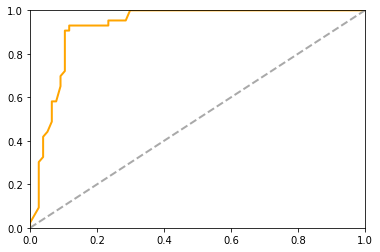

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(fpr,trp,color='orange',lw=2,label="Roc curve")
plt.plot([0,1],[0,1],color="darkgrey",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.figure()

(0.0, 1.0)

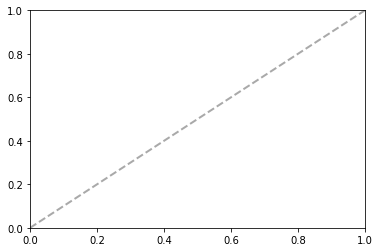

In [ ]:
plt.plot([0,1],[0,1],color="darkgrey",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

In [ ]:
from sklearn.model_selection import GridSearchCV